# Yuki Tsunoda
<img src="https://www.formula1.com/content/fom-website/en/drivers/yuki-tsunoda/_jcr_content/image.img.1920.medium.jpg/1641829679198.jpg" width="300">

### Team: AlphaTauri
<img src ="https://www.formula1.com/content/fom-website/en/drivers/yuki-tsunoda/_jcr_content/helmet.img.png/1646824917377.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

tsu_laps <- lap_data %>%
            filter(driverId == 852)

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5655436,94.25726,1.570954


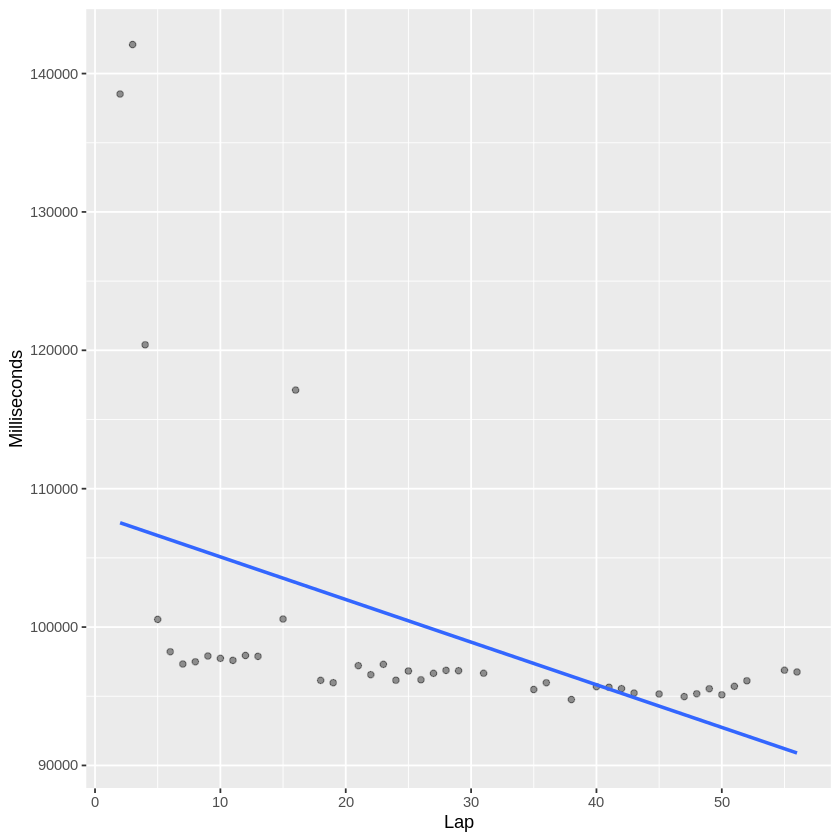

In [4]:
#1. Bahrain 

yt_bahrain <- tsu_laps %>%
                filter(raceId %in% bahrain_race_ID) 

yt_bahrain_clean <- yt_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))

yt_bahrain_clean_ID <- yt_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_bahrain_races <- tsu_laps %>%
                    filter(raceId %in% yt_bahrain_clean_ID)

formulaone_split <- initial_split(yt_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1054,65


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5750783,95.84638,1.59744


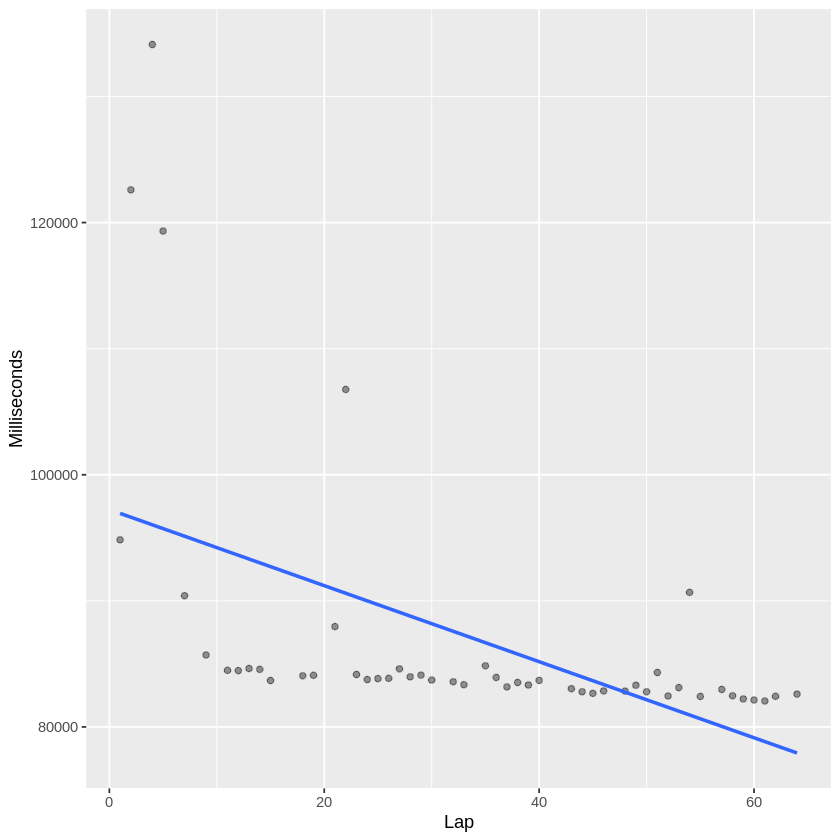

In [5]:
#2. Portimão

yt_Portimão <- tsu_laps %>%
                filter(raceId %in% Portimão_race_ID) 

yt_Portimão_clean <- yt_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_Portimão_clean
yt_Portimão_clean_ID <- yt_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_Portimão_races <- tsu_laps %>%
                    filter(raceId %in% yt_Portimão_clean_ID) 

formulaone_split <- initial_split(yt_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_Portimão_prediction()

In [6]:
#3. Australia

# yt_aus <- tsu_laps %>%
#                 filter(raceId %in% aus_race_ID) 

# yt_aus_clean <- yt_aus %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# yt_aus_clean
# yt_aus_clean_ID <- yt_aus_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# yt_aus_races <- tsu_laps %>%
#                     filter(raceId %in% yt_aus_clean_ID)

# formulaone_split <- initial_split(yt_aus_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression() 

### GETS PREDICTION

# get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5907266,98.45444,1.640907


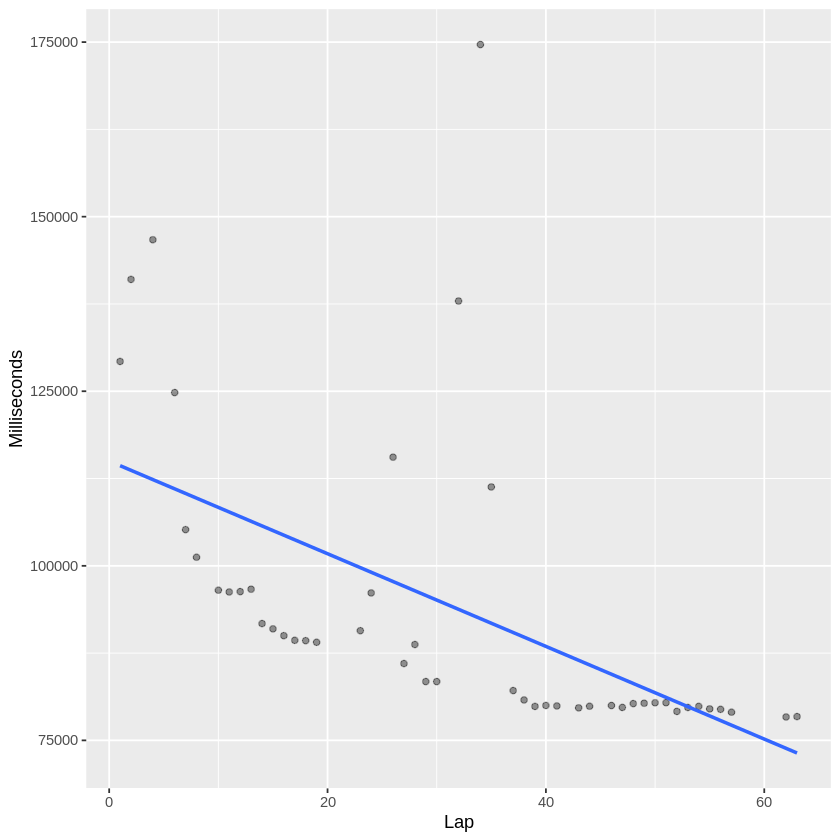

In [7]:
#4. Italy, Imola

yt_imola <- tsu_laps %>%
                filter(raceId %in% imola_race_ID) 

yt_imola_clean <- yt_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

yt_imola_clean_ID <- yt_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_imola_races <- tsu_laps %>%
                    filter(raceId %in% yt_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(yt_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5454875,90.91458,1.515243


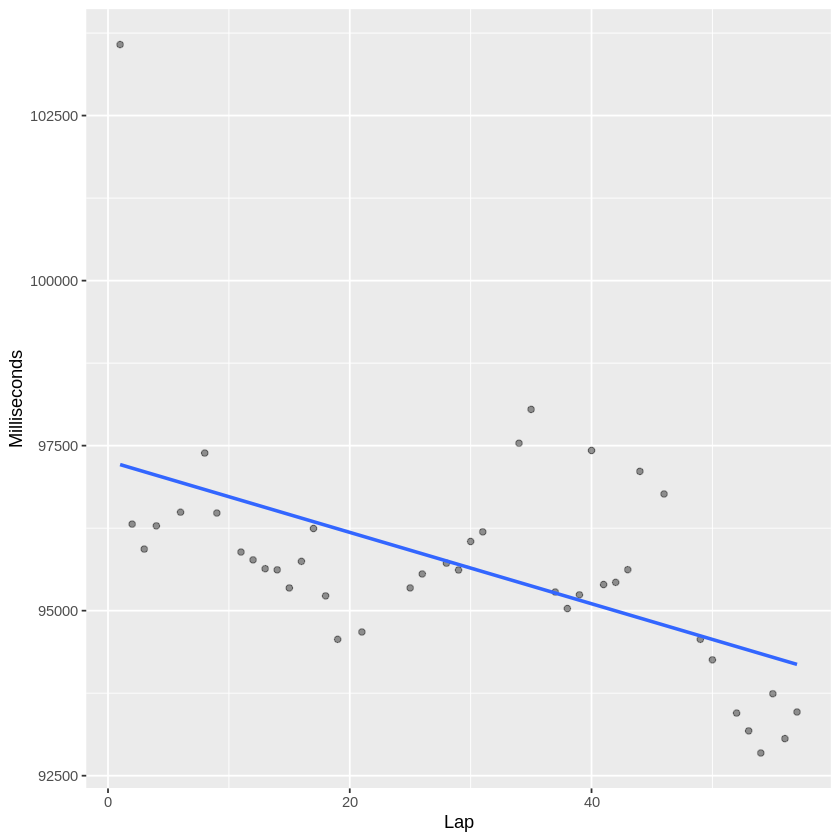

In [8]:
#5. Turkey (Replacing Miami)

yt_turkey <- tsu_laps %>%
                filter(raceId %in% turkey_race_ID) 

yt_turkey_clean <- yt_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

yt_turkey_clean_ID <- yt_turkey_clean %>%
                        pull(raceId)

### SPLITTING DATA

yt_turkey_races <- tsu_laps %>%
                    filter(raceId %in% yt_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(yt_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 0 breaks instead.”
Warning message:
“Too little data to stratify. Unstratified resampling will be used.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
665257.3,11.08762,0.1847937


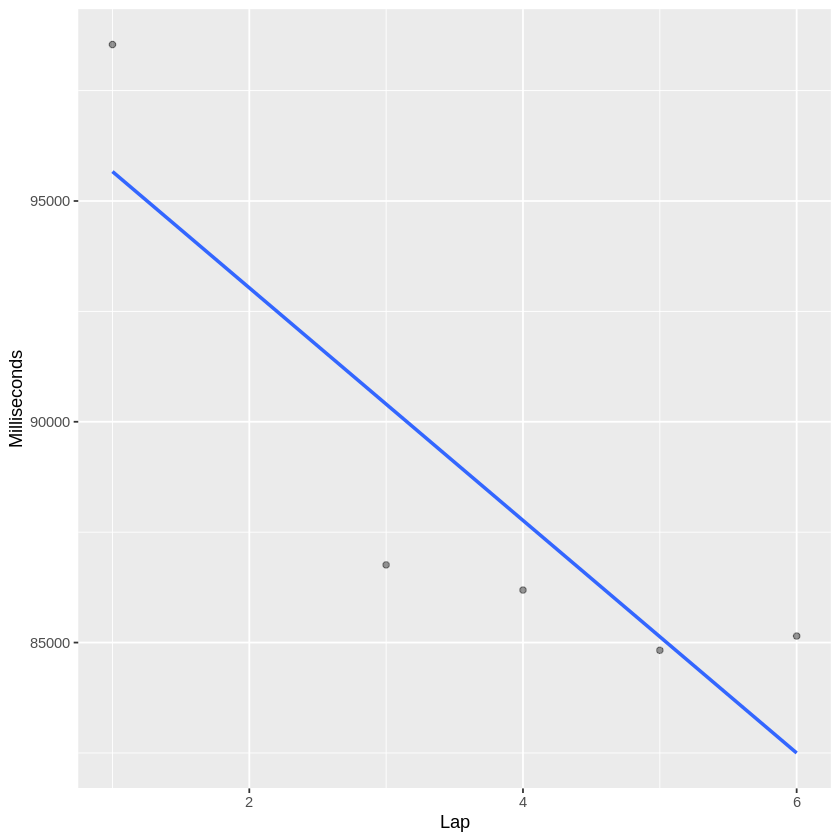

In [9]:
#6. Spain

yt_spain <- tsu_laps %>%
                filter(raceId %in% spain_race_ID) 

yt_spain_clean <- yt_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

yt_spain_clean_ID <- yt_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_spain_races <- tsu_laps %>%
                    filter(raceId %in% yt_spain_clean_ID)

formulaone_split <- initial_split(yt_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1056,77


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6050878,100.848,1.680799


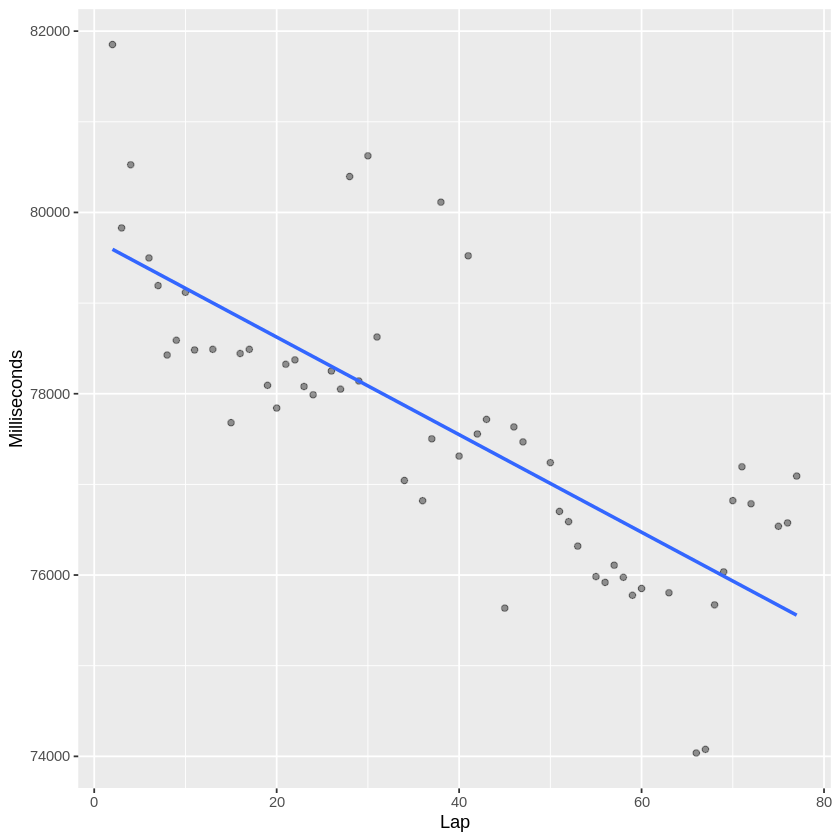

In [10]:
#7. Monaco

yt_monaco <- tsu_laps %>%
                filter(raceId %in% monaco_race_ID) 

yt_monaco_clean <- yt_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_monaco_clean
yt_monaco_clean_ID <- yt_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_monaco_races <- tsu_laps %>%
                    filter(raceId %in% yt_monaco_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(yt_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1057,51


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6024637,100.4106,1.67351


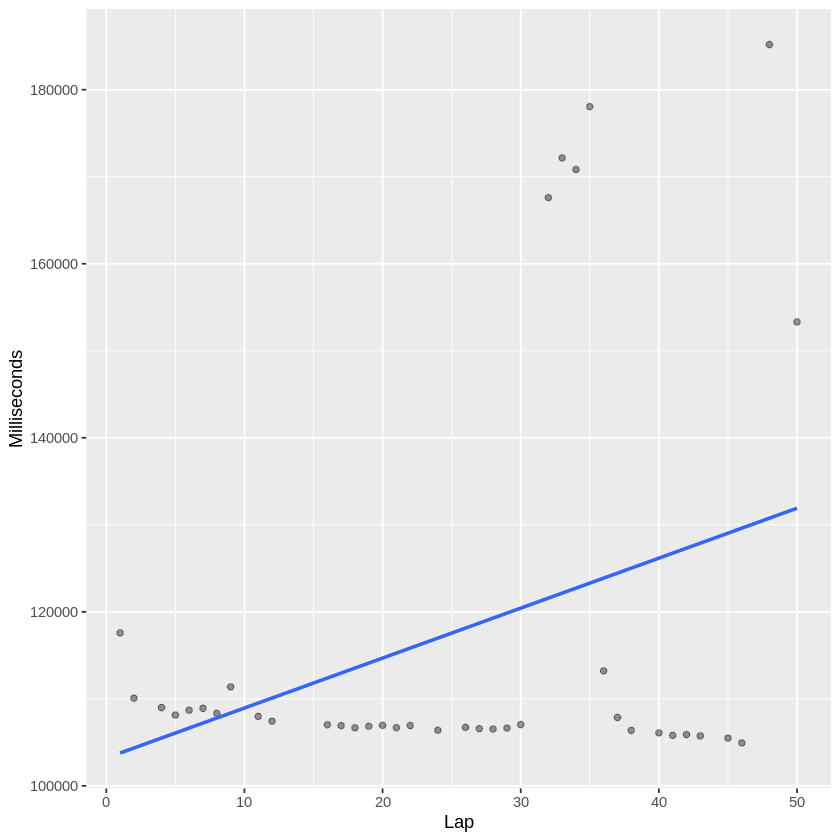

In [11]:
#8. Azerbaijan

yt_azerbaijan <- tsu_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

yt_azerbaijan_clean <- yt_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_azerbaijan_clean
yt_azerbaijan_clean_ID <- yt_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_azerbaijan_races <- tsu_laps %>%
                    filter(raceId %in% yt_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(yt_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_azerbaijan_prediction()

In [12]:
#9. Canada

# yt_canada <- tsu_laps %>%
#                 filter(raceId %in% canada_race_ID) 

# yt_canada_clean <- yt_canada %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# yt_canada_clean
# yt_canada_clean_ID <- yt_canada_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# yt_canada_races <- tsu_laps %>%
#                     filter(raceId %in% yt_canada_clean_ID)

# formulaone_split <- initial_split(yt_canada_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

### GETS PREDICTION

# get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1061,52


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
4863475,81.05791,1.350965


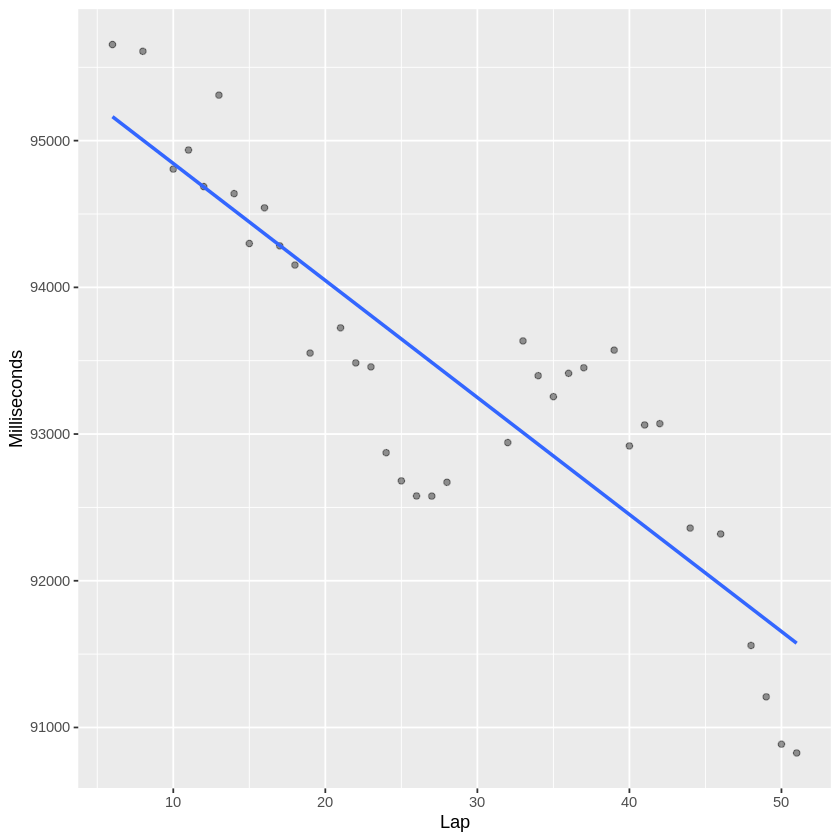

In [13]:
#10. Great Britain

yt_uk <- tsu_laps %>%
                filter(raceId %in% uk_race_ID) 

yt_uk_clean <- yt_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_uk_clean
yt_uk_clean_ID <- yt_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_uk_races <- tsu_laps %>%
                    filter(raceId %in% yt_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(6:598)

formulaone_split <- initial_split(yt_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1058,70
1060,70


`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5046362,84.10603,1.401767


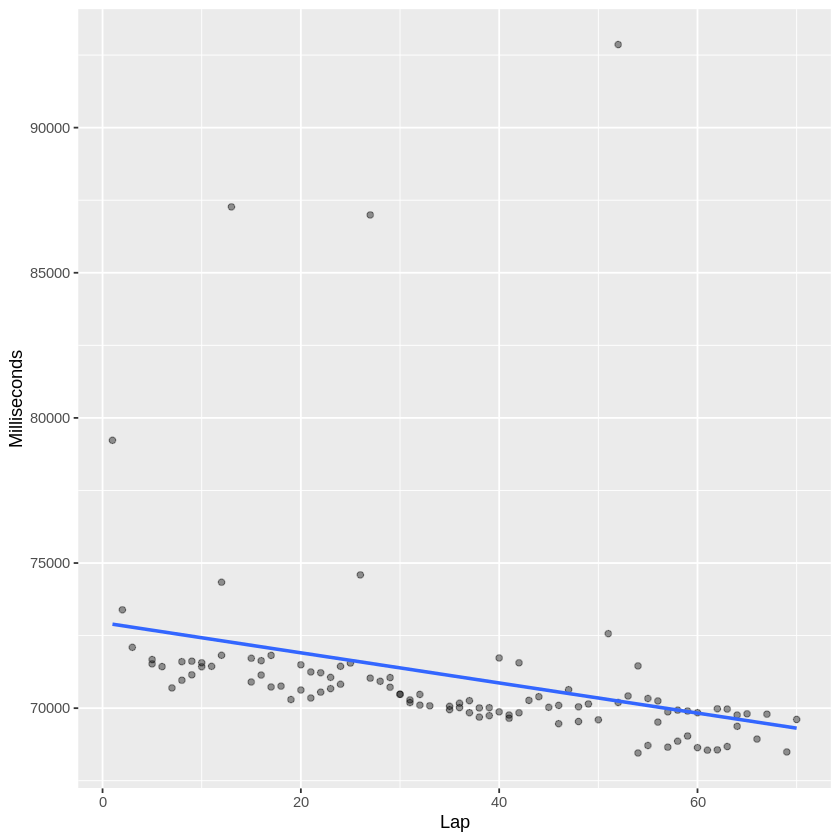

In [14]:
#11. Austria

yt_austria <- tsu_laps %>%
                filter(raceId %in% austria_race_ID) 

yt_austria_clean <- yt_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_austria_clean
yt_austria_clean_ID <- yt_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_austria_races <- tsu_laps %>%
                    filter(raceId %in% yt_austria_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(4:1000)

formulaone_split <- initial_split(yt_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1059,52


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5356288,89.27147,1.487858


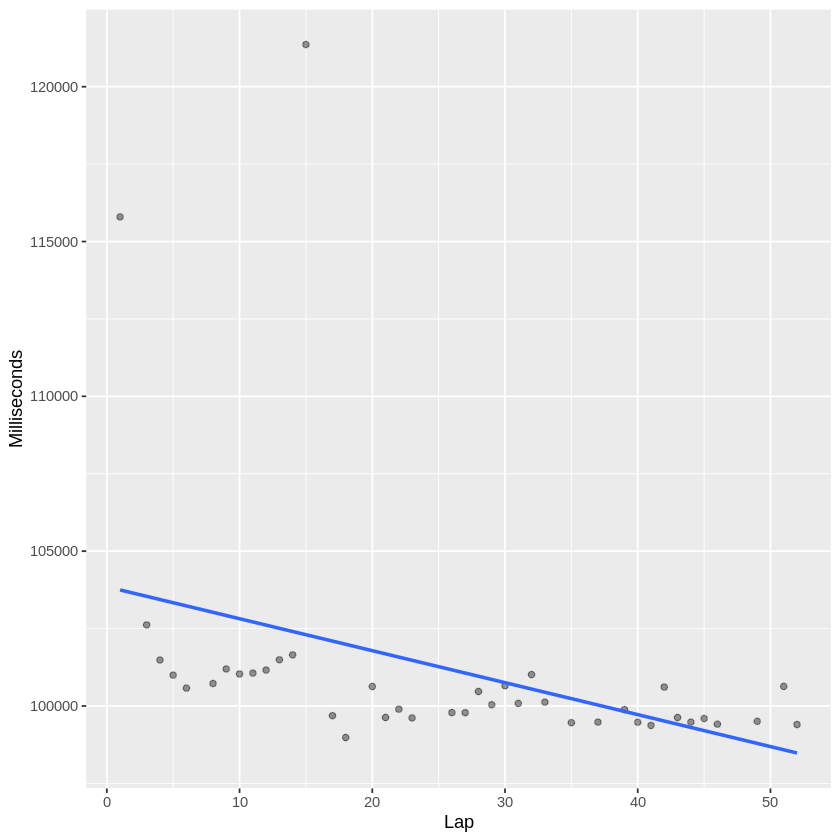

In [15]:
#12. France

yt_france <- tsu_laps %>%
                filter(raceId %in% france_race_ID) 

yt_france_clean <- yt_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_france_clean
yt_france_clean_ID <- yt_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_france_races <- tsu_laps %>%
                    filter(raceId %in% yt_france_clean_ID)

formulaone_split <- initial_split(yt_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1062,70


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
6010856,100.1809,1.669682


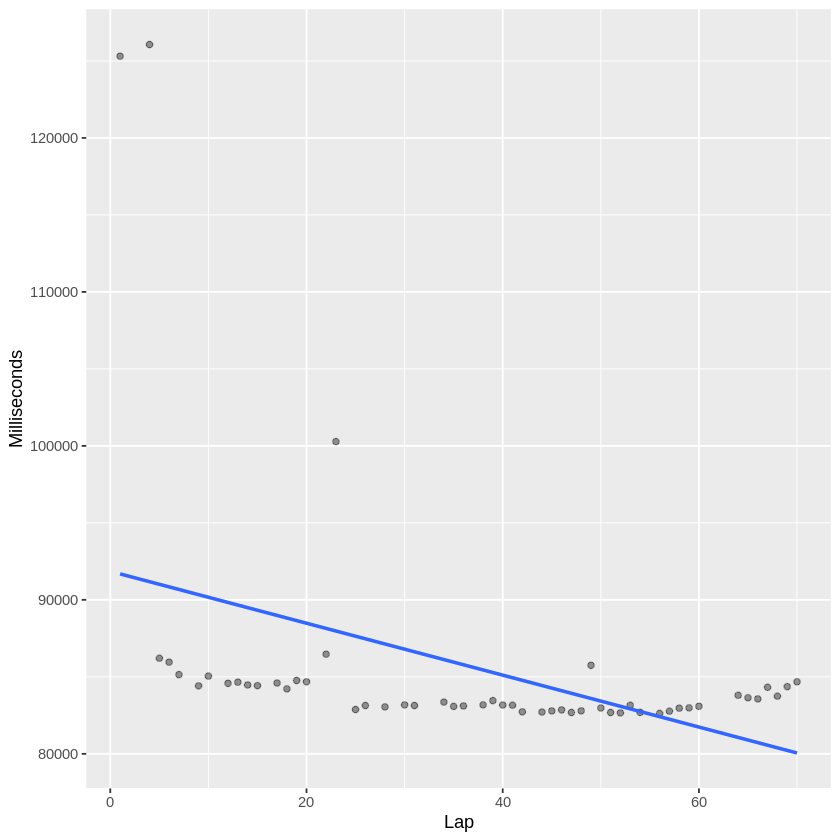

In [16]:
#13. Hungary

yt_hungary <- tsu_laps %>%
                filter(raceId %in% hungary_race_ID) 

yt_hungary_clean <- yt_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))                      
yt_hungary_clean
yt_hungary_clean_ID <- yt_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_hungary_races <- tsu_laps %>%
                    filter(raceId %in% yt_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>% 
                    slice(3:598)

formulaone_split <- initial_split(yt_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_hungary_prediction()

In [17]:
#14. Belgium

# yt_belgium <- tsu_laps %>%
#                 filter(raceId %in% belgium_race_ID) 

# yt_belgium_clean <- yt_belgium %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# yt_belgium_clean
# yt_belgium_clean_ID <- yt_belgium_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# yt_belgium_races <- tsu_laps %>%
#                     filter(raceId %in% yt_belgium_clean_ID)

# formulaone_split <- initial_split(yt_belgium_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

### GETS PREDICTION

# get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,48


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>
5642324,94.03873,1.567312


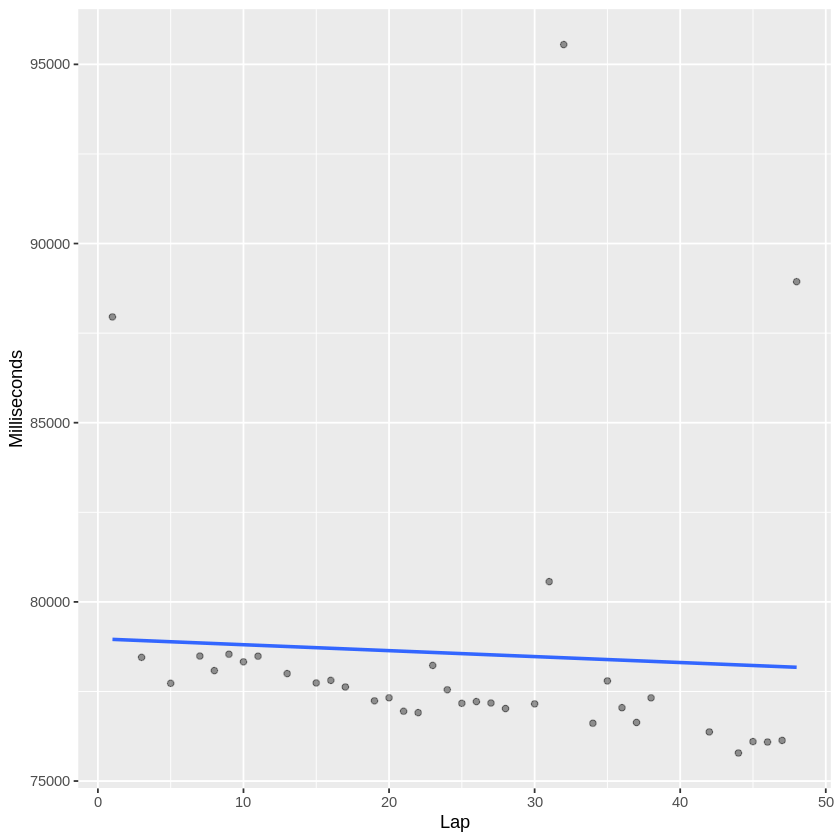

In [18]:
#15. Netherlands

yt_netherlands <- tsu_laps %>%
                filter(raceId %in% netherlands_race_ID) 

yt_netherlands_clean <- yt_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_netherlands_clean
yt_netherlands_clean_ID <- yt_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_netherlands_races <- tsu_laps %>%
                    filter(raceId %in% yt_netherlands_clean_ID)

formulaone_split <- initial_split(yt_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

get_netherlands_prediction()

In [19]:
#16. Italy, Monza

# yt_monza <- tsu_laps %>%
#                 filter(raceId %in% monza_race_ID) 

# yt_monza_clean <- yt_monza %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n))
# yt_monza_clean
# yt_monza_clean_ID <- yt_monza_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# yt_monza_races <- tsu_laps %>%
#                     filter(raceId %in% yt_monza_clean_ID)

# formulaone_split <- initial_split(yt_monza_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

### GETS PREDICTION

# get_monza_prediction()

In [20]:
#17. Singapore

# yt_singapore <- tsu_laps %>%
#                 filter(raceId %in% singapore_race_ID) 

# yt_singapore_clean <- yt_singapore %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 
# yt_singapore_clean
# yt_singapore_clean_ID <- yt_singapore_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# yt_singapore_races <- tsu_laps %>%
#                     filter(raceId %in% yt_singapore_clean_ID)

# formulaone_split <- initial_split(yt_singapore_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

### GETS PREDICTION

# get_singapore_prediction()

In [21]:
#18. Japan

# yt_japan <- tsu_laps %>%
#                 filter(raceId %in% japan_race_ID) 

# yt_japan_clean <- yt_japan %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n))

# yt_japan_clean_ID <- yt_japan_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# yt_japan_races <- tsu_laps %>%
#                     filter(raceId %in% yt_japan_clean_ID)

# formulaone_split <- initial_split(yt_japan_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

### GETS PREDICTION

# get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1069,55


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



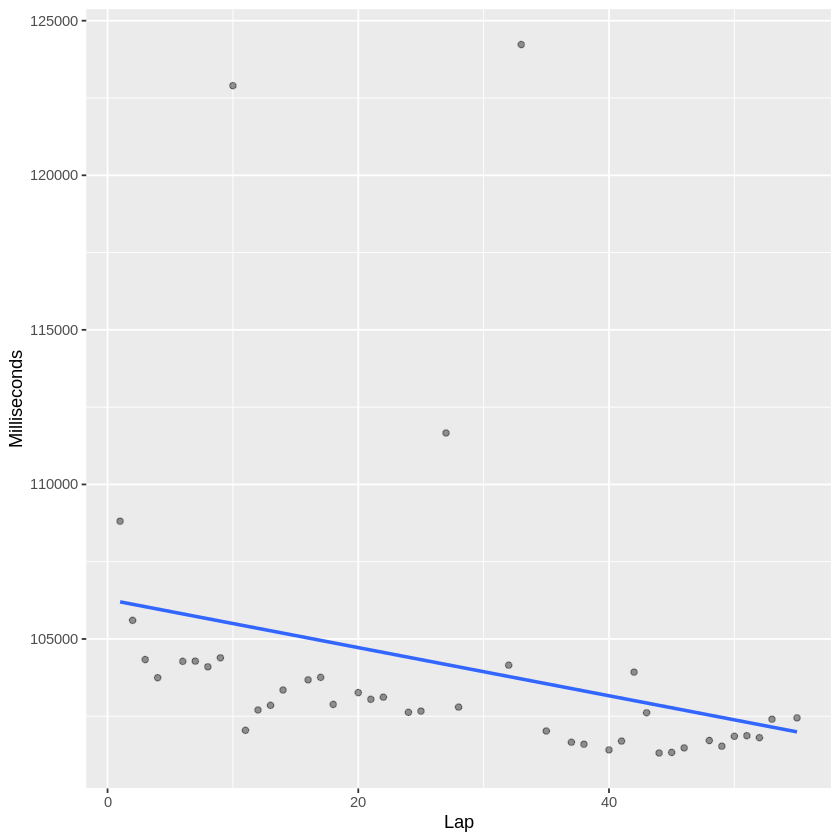

In [22]:
#19. USA, Austin

yt_austin <- tsu_laps %>%
                filter(raceId %in% austin_race_ID) 

yt_austin_clean <- yt_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_austin_clean
yt_austin_clean_ID <- yt_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_austin_races <- tsu_laps %>%
                    filter(raceId %in% yt_austin_clean_ID)

formulaone_split <- initial_split(yt_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

# get_austin_prediction()

In [23]:
#20. Mexico

# yt_mexico <- tsu_laps %>%
#                 filter(raceId %in% mexico_race_ID) 

# yt_mexico_clean <- yt_mexico %>%
#                         group_by(raceId) %>%
#                         summarize(n = n()) %>%
#                         arrange(desc(n)) 

# yt_mexico_clean_ID <- yt_mexico_clean %>%
#                         pull(raceId)


# ### SPLITTING DATA

# yt_mexico_races <- tsu_laps %>%
#                     filter(raceId %in% yt_mexico_clean_ID)

# formulaone_split <- initial_split(yt_mexico_races, prop = 0.75, strata = milliseconds)

# initiate_split_data()

# ### RUNS REGRESSION

# initiate_linear_regression()

### GETS PREDICTION

# get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1071,70


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



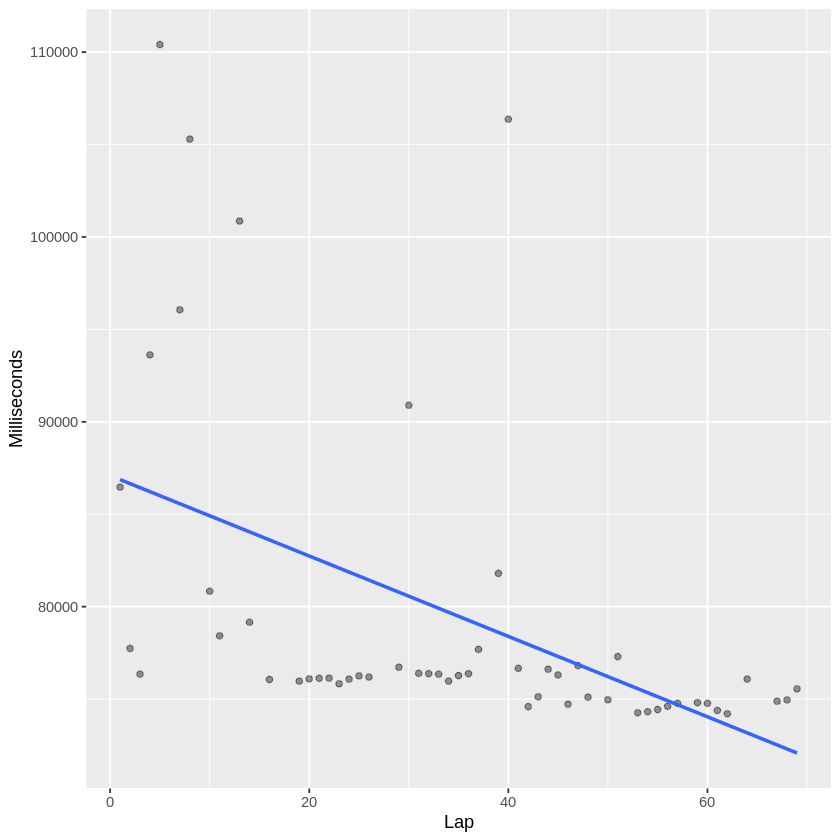

In [24]:
#21. Brazil

yt_brazil <- tsu_laps %>%
                filter(raceId %in% brazil_race_ID) 

yt_brazil_clean <- yt_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_brazil_clean
yt_brazil_clean_ID <- yt_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_brazil_races <- tsu_laps %>%
                    filter(raceId %in% yt_brazil_clean_ID)

formulaone_split <- initial_split(yt_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

# get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1073,58


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



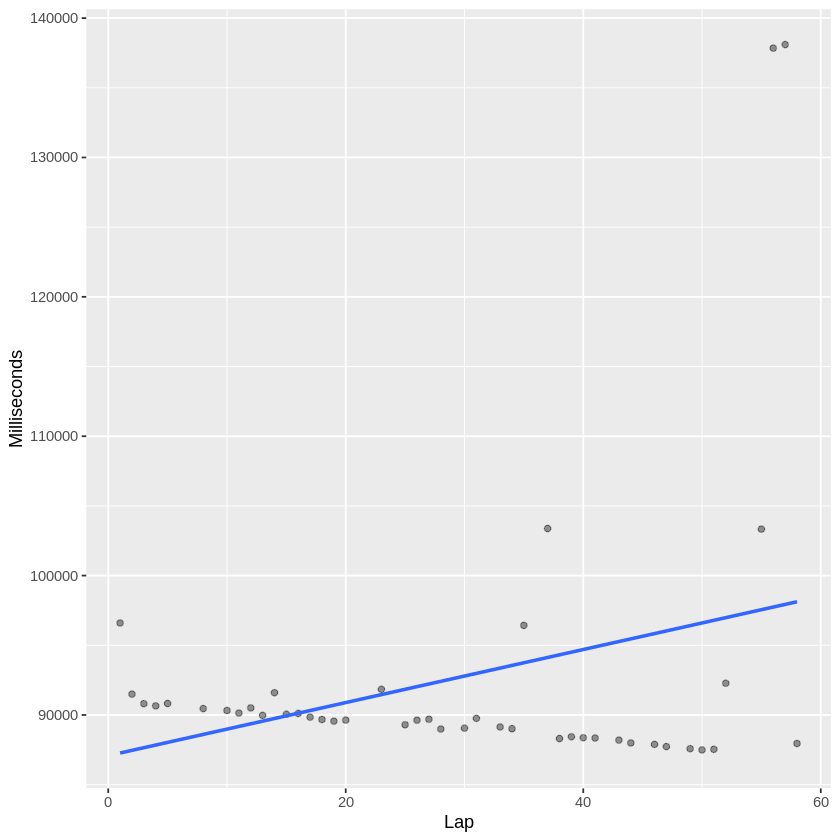

In [25]:
#22. Abu Dhabi

yt_uae <- tsu_laps %>%
                filter(raceId %in% uae_race_ID) 

yt_uae_clean <- yt_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_uae_clean
yt_uae_clean_ID <- yt_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_uae_races <- tsu_laps %>%
                    filter(raceId %in% yt_uae_clean_ID)

formulaone_split <- initial_split(yt_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

### GETS PREDICTION

# get_uae_prediction()